In [18]:
import pandas as pd
import fastparquet
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# df =  pd.read_parquet("/home/costela/Documentos/Escorpiao-series/Dados_processados/2_df_recodificado.parquet")

df = pd.read_parquet('/home/usuario/Documentos/Escorpiao_series/Dados_processados/2_df_recodificado.parquet')
df = df[df['DT_SIN_PRI'].dt.year > 2014]
df = df[['DT_SIN_PRI','NU_AMPOL_9','EVOLUCAO']]
#df['NU_AMPOL_9'] = df['NU_AMPOL_9'].astype(int)

In [22]:
# 1. Substitui a vírgula por ponto
df['NU_AMPOL_9'] = df['NU_AMPOL_9'].str.replace(',', '.')

# 2. Converte para numérico (trata vazios e erros como NaN automaticamente)
df['NU_AMPOL_9'] = pd.to_numeric(df['NU_AMPOL_9'], errors='coerce')

# 3. Se houver NaNs, preencha-os (opcional, aqui com 0)
df['NU_AMPOL_9'] = df['NU_AMPOL_9'].fillna(0)

# 4. Agora converta para inteiro
df['NU_AMPOL_9'] = df['NU_AMPOL_9'].astype(int)


In [23]:
dfg = df.groupby('DT_SIN_PRI').size().reset_index(name='CASOS').sort_index()
dfg['TX'] = (dfg['CASOS'] / 44000000 * 100000000).round(1)

In [30]:
dfg = df.groupby('DT_SIN_PRI')['NU_AMPOL_9'].sum().reset_index()
dfg

,DT_SIN_PRI,NU_AMPOL_9
0,2015-01-01,6
1,2015-01-02,2
2,2015-01-03,10
3,2015-01-04,5
4,2015-01-05,6
...,...,...
2394,2023-12-08,20
2395,2023-12-09,9
2396,2023-12-10,19
2397,2023-12-11,51


In [37]:
dfg.NU_AMPOL_9.describe()

count    2399.000000
mean        8.101709
std         7.992260
min         0.000000
25%         2.000000
50%         6.000000
75%        12.000000
max       105.000000
Name: NU_AMPOL_9, dtype: float64

In [39]:
df[df['NU_AMPOL_9'] > 6]

,DT_SIN_PRI,NU_AMPOL_9,EVOLUCAO
1178,2020-10-01,8,Cura
3696,2020-01-02,8,Cura
7232,2020-08-03,10,Cura
25902,2020-02-10,7,Cura
36795,2016-02-04,8,Obito por outra causa
...,...,...,...
267291,2023-07-08,7,Cura
267927,2023-11-08,9,Obito por ap
272340,2023-09-09,13,Cura
282735,2023-08-11,8,None


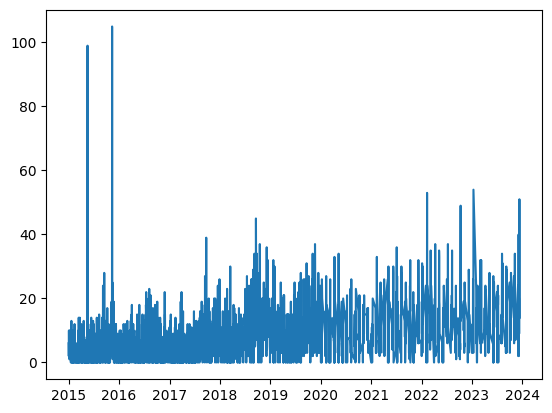

In [31]:
plt.plot(dfg['DT_SIN_PRI'], dfg['NU_AMPOL_9'])

In [36]:
df.describe()

,DT_SIN_PRI,ANT_DT_ACI,DT_OBITO,DT_ENCERRA,DT_DIGITA,IDADE_ANOS,ANO,MES,POPULACAO
count,191830,191917,85,189762,228321,291772.000000,191830.000000,191830.000000,2.917700e+05
mean,2019-02-03 11:00:56.712713984,2019-02-03 06:20:02.807463424,2019-06-20 04:48:00,2019-02-05 02:37:04.858506496,2020-07-02 23:03:07.835547392,39.439227,2018.573091,6.848517,2.969957e+05
min,2012-06-22 00:00:00,2011-07-08 00:00:00,2014-10-18 00:00:00,2014-01-01 00:00:00,2014-01-02 00:00:00,0.000000,1940.000000,1.000000,9.320000e+02
25%,2017-02-21 00:00:00,2017-02-20 00:00:00,2017-09-15 00:00:00,2017-02-23 00:00:00,2017-09-05 00:00:00,23.000000,2017.000000,4.000000,1.973300e+04
50%,2018-12-25 00:00:00,2018-12-24 00:00:00,2019-03-10 00:00:00,2018-12-28 00:00:00,2021-06-22 00:00:00,39.000000,2018.000000,7.000000,6.162500e+04
75%,2021-02-09 00:00:00,2021-02-09 00:00:00,2021-09-01 00:00:00,2021-02-07 00:00:00,2022-11-18 00:00:00,56.000000,2021.000000,10.000000,2.084150e+05
max,2023-12-12 00:00:00,2023-12-12 00:00:00,2023-09-26 00:00:00,2025-05-03 00:00:00,2063-12-03 00:00:00,116.000000,2023.000000,12.000000,1.190496e+07
std,NaN,NaN,NaN,NaN,NaN,20.908029,2.627163,3.569217,1.297901e+06


In [38]:
df.loc[df['ANO']> 2021, ['DT_SIN_PRI','ANO']]

,DT_SIN_PRI,ANO
86588,2022-01-01,2022.0
86589,2022-01-01,2022.0
86590,2022-01-01,2022.0
86591,2022-01-01,2022.0
86592,2022-01-01,2022.0
...,...,...
291319,2023-10-11,2023.0
291320,2023-02-12,2023.0
291321,2023-06-11,2023.0
291448,2023-09-12,2023.0
